<a href="https://colab.research.google.com/github/GabrielVidoiMendonca/ATIVIDADE-AIENGENEERING-IOT/blob/main/material/aulas/PDI/lab03/atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Histograma e equalização de histograma
*   Seguimentação com auxilio do histograma
*   Webcam opencv

## Introdução aos Histogramas

Um histograma é uma representação gráfica da distribuição dos níveis de intensidade em uma imagem. Em imagens em escala de cinza, ele mostra a frequência de ocorrência de cada nível de cinza (0 a 255). Em imagens coloridas, o histograma pode ser calculado separadamente para cada canal (R, G e B).

**Por que utilizar histogramas?**
- Análise de contraste e brilho.
- Detecção de problemas de exposição.
- Base para técnicas de equalização e normalização.

In [1]:
## Vou fazer o download das imagens do laboratório diretamente do repositório para ficar mais facil....

import requests
import os

# Define o laboratório
laboratorio = 'lab03'  ### altere para o laboratório desejado
diretorio = 'lab_images'  ### altere para o diretório que deseja salvar as imagens

# Download de um arquivo
def download_file(url, destination):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Baixado: {destination}")
    else:
        print(f"Erro ao baixar {url}")

# Monta a URL completa
api_url = "https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/"
url_completa = api_url + laboratorio
print(f"Fazendo o download de: {url_completa}")

# checa se a URL está acessível
response = requests.get(url_completa)
if response.status_code != 200:
    raise Exception(f"Erro ao acessar o repositório: {response.status_code}")
files = response.json()


# Faz o download de cada arquivo
os.makedirs(diretorio, exist_ok=True) # Cria a pasta downloads
for file in files:
    file_name = file['name']
    if file_name.endswith(('.png', '.jpg', '.jpeg', '.mp4')):  # Adicione mais extensões se necessário
        file_url = file['download_url']
        destination = os.path.join(diretorio, file_name)
        download_file(file_url, destination)

print(f"Download concluído. Arquivos salvos na pasta {diretorio}.")

Fazendo o download de: https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/lab03
Baixado: lab_images/bola.png
Baixado: lab_images/bolinha.png
Baixado: lab_images/fuca.png
Download concluído. Arquivos salvos na pasta lab_images.


In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.11.0 


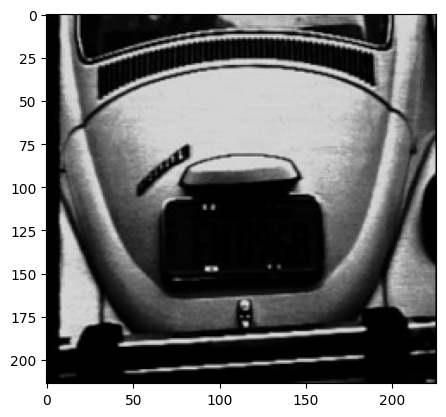

In [13]:
img = cv2.imread("lab_images/fuca.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)


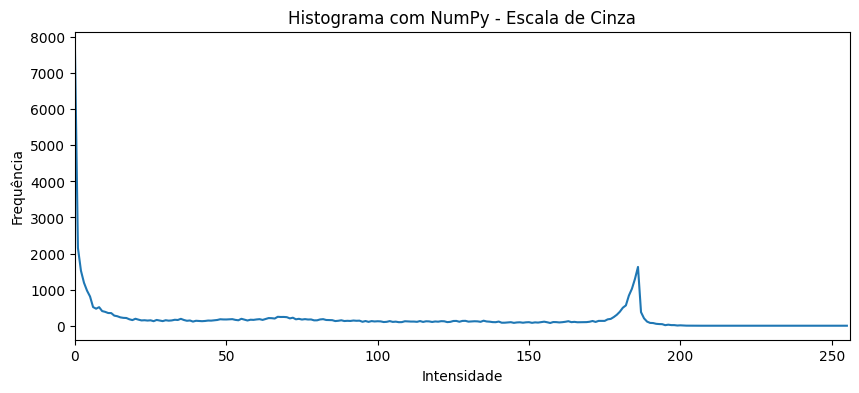

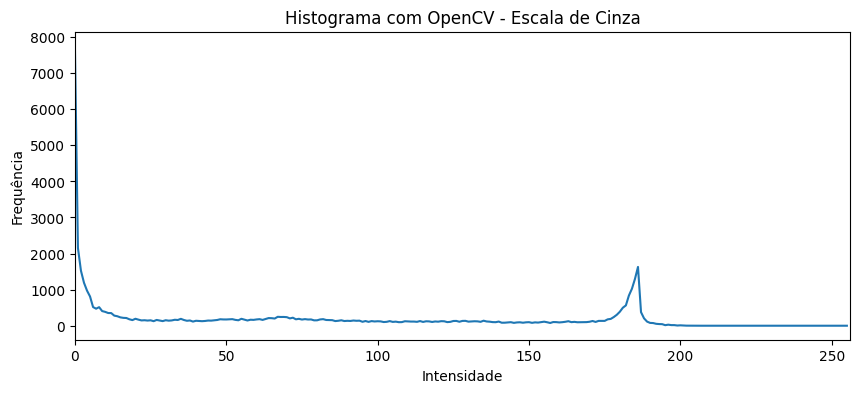

<ipython-input-14-d76b507697ad>:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(),256,[0,256])


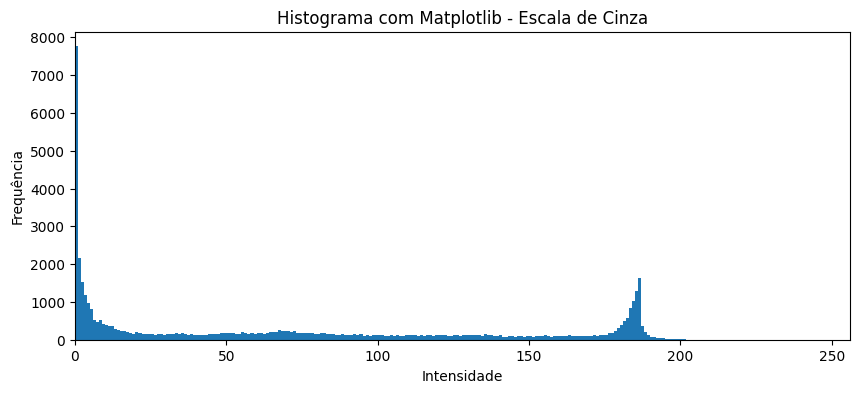

In [14]:

img_gray = img

# Calculando histograma com NumPy para imagem em escala de cinza
hist_np, bins = np.histogram(img_gray.ravel(), bins=256, range=[0,256])
plt.figure(figsize=(10,4))
plt.title('Histograma com NumPy - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.plot(hist_np)
plt.xlim([0,256])
plt.show()

# Calculando histograma com OpenCV para imagem em escala de cinza
hist_cv = cv2.calcHist([img_gray], [0], None, [256], [0,256])
plt.figure(figsize=(10,4))
plt.title('Histograma com OpenCV - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.plot(hist_cv)
plt.xlim([0,256])
plt.show()

# Exibindo o histograma com a função plt.hist
plt.figure(figsize=(10,4))
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histograma com Matplotlib - Escala de Cinza')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.xlim([0,256])
plt.show()


## Desafio1

- Quais são as diferenças e similaridades entre as abordagens?

- Importância do parâmetro range e do número de bins.


## Equalização do Histograma

A equalização de histograma é uma técnica utilizada para melhorar o contraste de uma imagem. Ela redistribui os níveis de intensidade de modo que o histograma da imagem equalizada se aproxime de uma distribuição uniforme. Isso é especialmente útil em imagens com contraste baixo ou má distribuição dos tons de cinza.

### Objetivos da Equalização:

- Melhorar o contraste: Ao expandir as áreas de baixa intensidade e comprimir as de alta intensidade, a imagem passa a apresentar mais detalhes.
- Realçar detalhes ocultos: Em imagens com fundo e objeto de intensidades muito próximas, a equalização pode ajudar a evidenciar detalhes que passariam despercebidos.


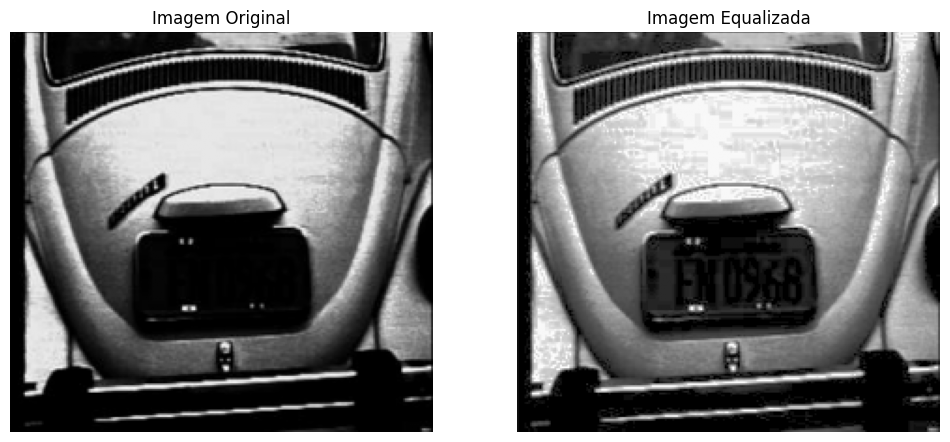

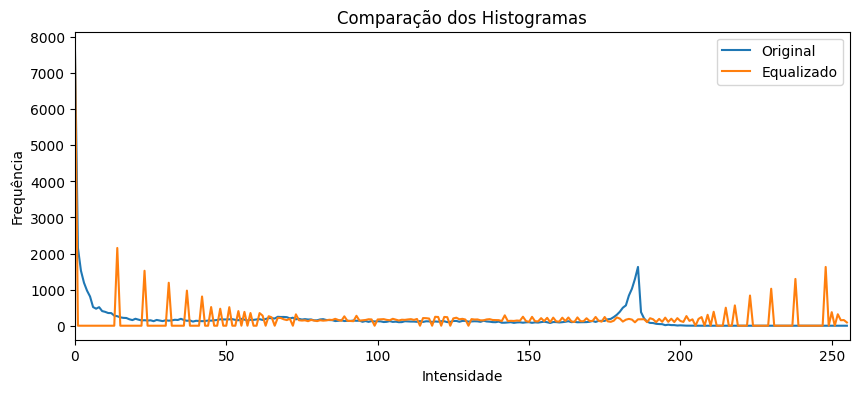

In [19]:
# Equalização do histograma utilizando OpenCV
img_eq = cv2.equalizeHist(img_gray)

# Plotando as imagens original e equalizada
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Imagem Equalizada')
plt.imshow(img_eq, cmap='gray')
plt.axis('off')
plt.show()

# Comparando os histogramas antes e depois da equalização
hist_original = cv2.calcHist([img_gray], [0], None, [256], [0,256])
hist_equalizado = cv2.calcHist([img_eq], [0], None, [256], [0,256])

plt.figure(figsize=(10,4))
plt.plot(hist_original, label='Original')
plt.plot(hist_equalizado, label='Equalizado')
plt.title('Comparação dos Histogramas')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.legend()
plt.xlim([0,256])
plt.show()

Podemos fazer o mesmo para uma imgem colorida

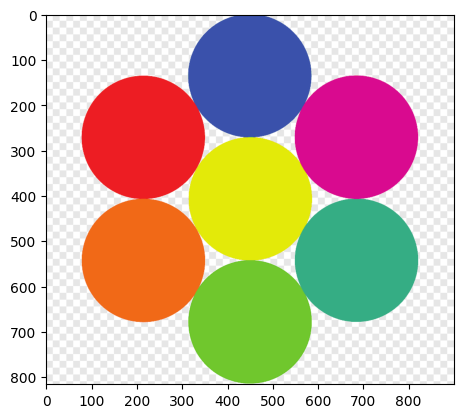

<ipython-input-22-9eb233aac9bb>:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(),256,[0,256]); plt.show()


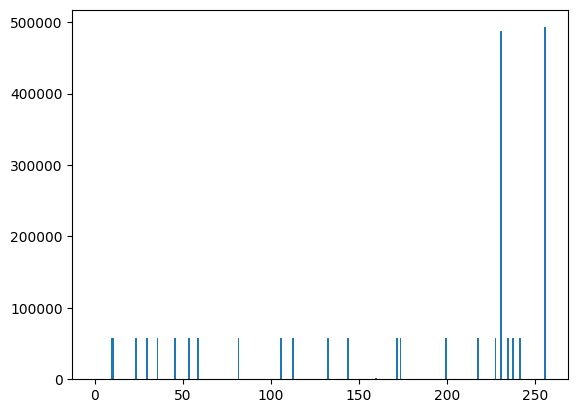

In [22]:
imagem = cv2.imread("lab_images/bola.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()
plt.hist(image.ravel(),256,[0,256]); plt.show()

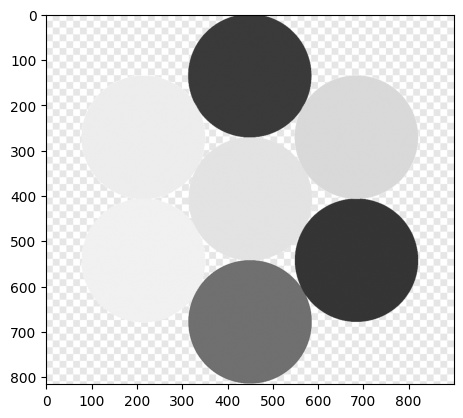

<ipython-input-23-e593e953d14a>:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image[:,:,0].ravel(),256,[0,256]); plt.show()


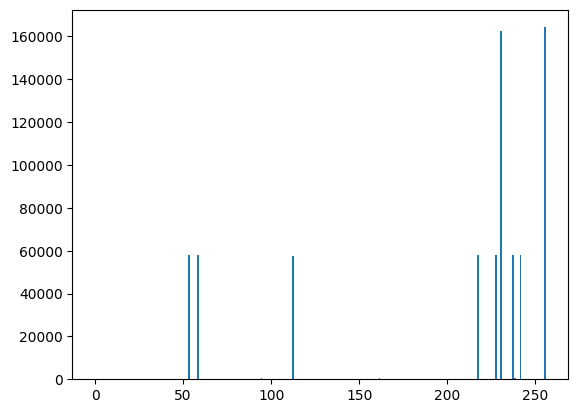

In [23]:
#histograma Vermelho
plt.imshow(image[:,:,0], cmap="gray", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,0].ravel(),256,[0,256]); plt.show()

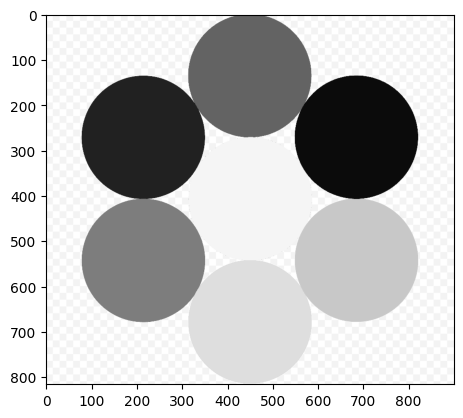

<ipython-input-24-cc0c9268bae9>:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image[:,:,1].ravel(),256,[0,256]); plt.show()


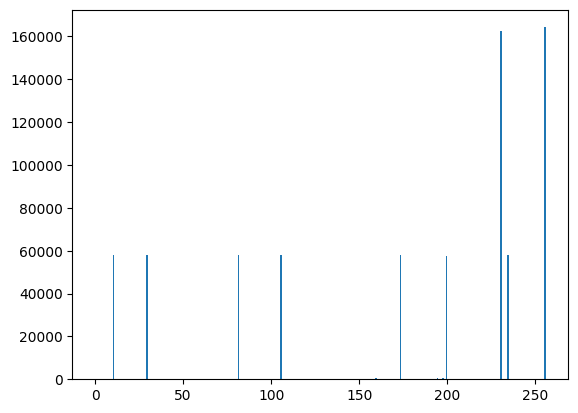

In [24]:
# Histogrma Verde
plt.imshow(image[:,:,1], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,1].ravel(),256,[0,256]); plt.show()

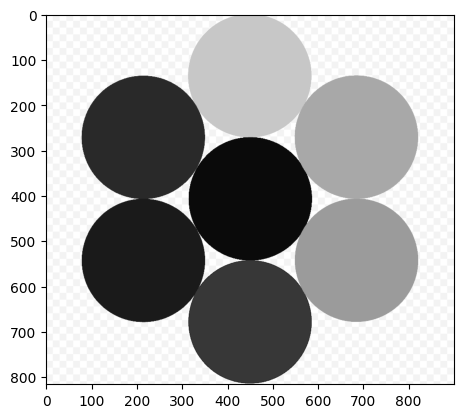

<ipython-input-25-4f8afee262cd>:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image[:,:,2].ravel(),256,[0,256]); plt.show()


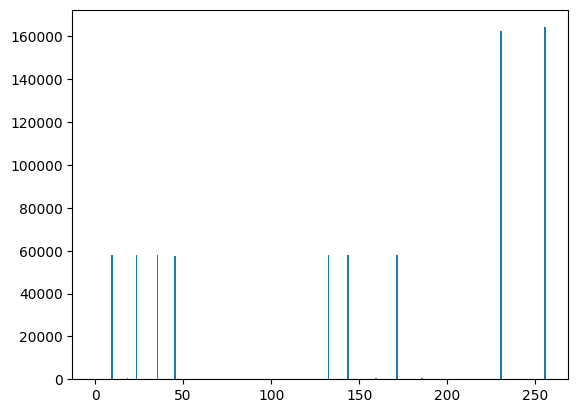

In [25]:
# Histograma Azul
plt.imshow(image[:,:,2], cmap="Greys_r", vmin=0, vmax=255); plt.show()
plt.hist(image[:,:,2].ravel(),256,[0,256]); plt.show()

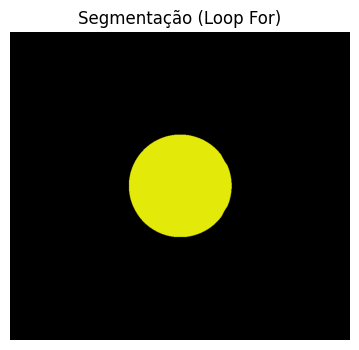

In [26]:
# Cria uma cópia para a segmentação
img_bola = image.copy()

# Varredura pixel a pixel utilizando laços for
for y in range(img_bola.shape[0]):
    for x in range(img_bola.shape[1]):
        # Condições aplicadas para o pixel (no formato RGB)
        # Aqui, se o canal verde <= 230 ou o canal vermelho >= 240, zera o pixel
        if img_bola[y, x, 1] <= 230 or img_bola[y, x, 0] >= 240:
            img_bola[y, x] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Loop For)')
# Convertendo de BGR para RGB para exibição correta
plt.imshow(img_bola)
plt.axis('off')
plt.show()

## Versão 2: Abordagem Vetorizada com NumPy

Nesta versão, criamos máscaras booleanas para cada condição e combinamos as máscaras para aplicar a segmentação de forma **vetorizada**.

**Essa abordagem é muito mais eficiente e concisa.**

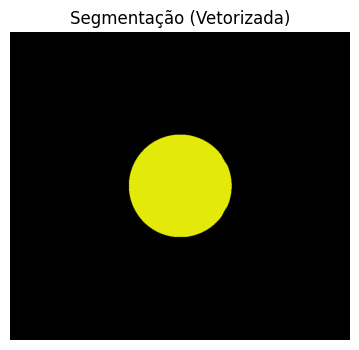

In [27]:
img_bola_vet = image.copy()

# Separando os canais (lembrando: B, G, R)
canal_vermelho = img_bola_vet[:, :, 0]
canal_verde = img_bola_vet[:, :, 1]

# Criar máscaras para as condições:
# - pixels com canal verde <= 230
# - pixels com canal vermelho >= 240
mask_verde = canal_verde <= 230
mask_vermelho  = canal_vermelho >= 240

# Combina as máscaras com operador lógico OR
mask = mask_verde | mask_vermelho

# Aplica a máscara: onde a condição é True, zera o pixel
img_bola_vet[mask] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Vetorizada)')
plt.imshow(img_bola_vet)
plt.axis('off')
plt.show()


## Desafio 2

Faça a seguimentação da bolinha de cor laranja.

Dica use 2 canais de cores para conseguir seguimentar.

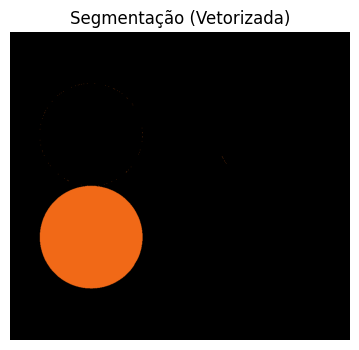

In [28]:
# Implemente seu código
img_bola_vet = image.copy()

#Separando os canais (lembrando: B, G, R)
canal_vermelho = img_bola_vet[:, :, 0]
canal_verde = img_bola_vet[:, :, 1]

#Criar máscaras para as condições:
mask_verde = canal_verde >= 200
mask_vermelho  = canal_vermelho <= 240

#Combina as máscaras com operador lógico OR
mask = mask_verde | mask_vermelho

#Aplica a máscara: onde a condição é True, zera o pixel
img_bola_vet[mask] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Vetorizada)')
plt.imshow(img_bola_vet)
plt.axis('off')
plt.show()






## Desafio 3

Faça a seguimentação da bolinha para a imagem "bolinha.png".

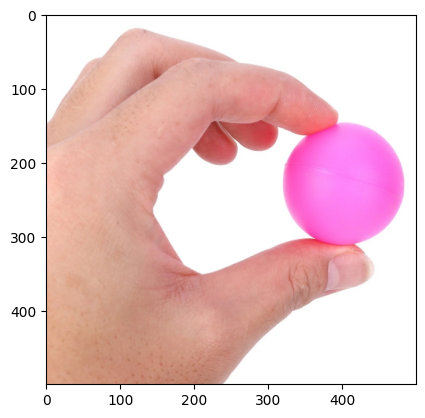

In [30]:
imagem = cv2.imread("lab_images/bolinha.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(image, vmin=0, vmax=255); plt.show()

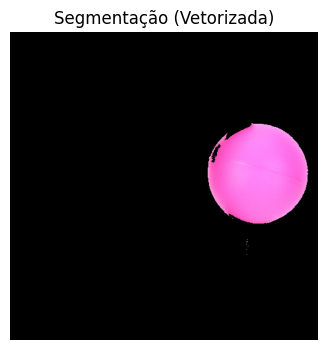

In [46]:
# Implemente seu código

imagem = cv2.imread("lab_images/bolinha.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#Separando os canais (lembrando: B, G, R)
canal_azul = image[:, :, 1]
canal_verde = image[:, :, 2]

#Criar máscaras para as condições:
mask_verde = canal_verde <= 180
mask_azul  = canal_azul >= 170

#Combina as máscaras com operador lógico OR
mask = mask_verde | mask_azul

#Aplica a máscara: onde a condição é True, zera o pixel
image[mask] = [0, 0, 0]

plt.figure(figsize=(6,4))
plt.title('Segmentação (Vetorizada)')
plt.imshow(image)
plt.axis('off')
plt.show()







## Webcam e OpenCV

## **Este recurso não vai funcionar no Google Colab**

Podemos usar a nossa webcam para registrar imagens e vídeos. Para isso, usamos a função `cv2.VideoCapture`.

### Em sua máquina local

1. **Crie um novo arquivo Python** ou use este notebook para executar o código abaixo.

2. **Escolha a fonte do video** se você quiser usar um vídeo MP4 em vez da webcam, basta passar o caminho do arquivo para cv2.VideoCapture:
    -  cv2.VideoCapture(0) # Inicializa a captura de vídeo da webcam (0 é o índice da câmera padrão)
    -  cv2.VideoCapture("video.mp4") # Carrega o arquivo de video



In [ ]:
import cv2

# Iniciando a captura de vídeo
cap = cv2.VideoCapture(0)

while True:
    # Tenta fazer a Captura do frame
    ret, frame = cap.read()

    # verifica se o frame foi capturado corretamente
    if not ret:
        print("Erro: Não foi possível capturar o frame.")
        break

    # processa o frame capturado
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Exibe o frame processado
    cv2.imshow('frame', gray)

    # Aguarda 1 ms e verifica se a tecla 'q' foi pressionada para sair
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libera a captura e fecha todas as janelas
cap.release()
cv2.destroyAllWindows()

Erro: Não foi possível capturar o frame.


OpenCV: out device of bound (0-1): 2
OpenCV: camera failed to properly initialize!


## Desafio 4

Crie um script Python que execute o processameento de um video (webcam ou arquivo mp4) em sua maquina local. Crie uma função que processa a imagem e realizada uma operação de processamento de imagem que vimos até o momento em nosso curso.  

In [47]:
# implemente seu código em um novo script python, não se esqueça de salvar o script no formato .py

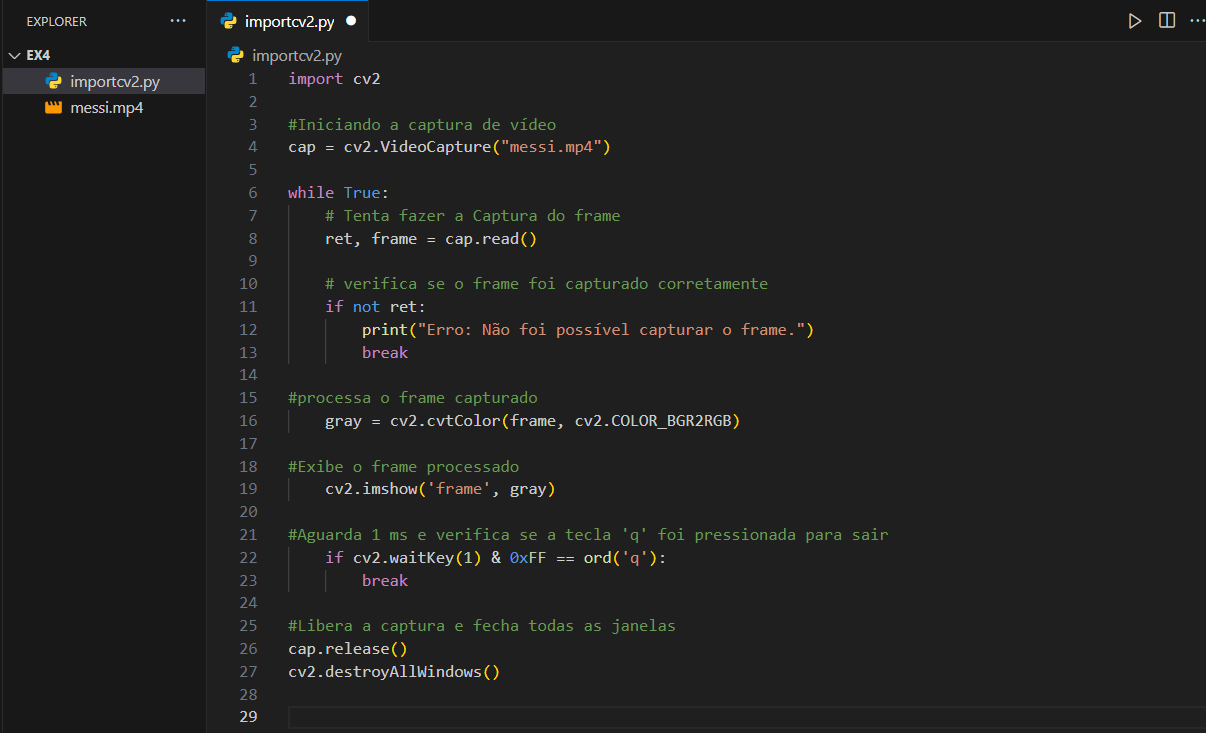

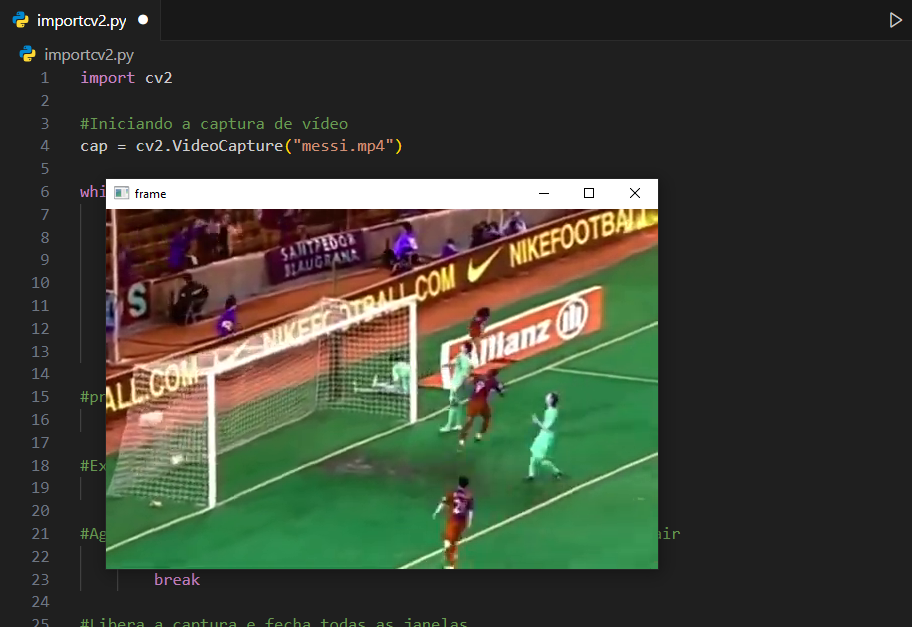